Beginners level Machine Learning (ML) project to build my skills. The aim here is to predict a students final score (G3) based on a number of factors. This will be a regression based ML project using sklearn.

# Content
The data set is from the UCL Machine Learning Repository. Link to dataset

Source:
Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez

Data Set Information:
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Attribute Information:
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - 1 hour)
studytime - weekly study time (numeric: 1 - 10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
these grades are related with the course subject, Math or Portuguese:
G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data and inspect it
maths = pd.read_csv('../input/student-grade-prediction/student-mat.csv')
print(maths.info())
maths.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


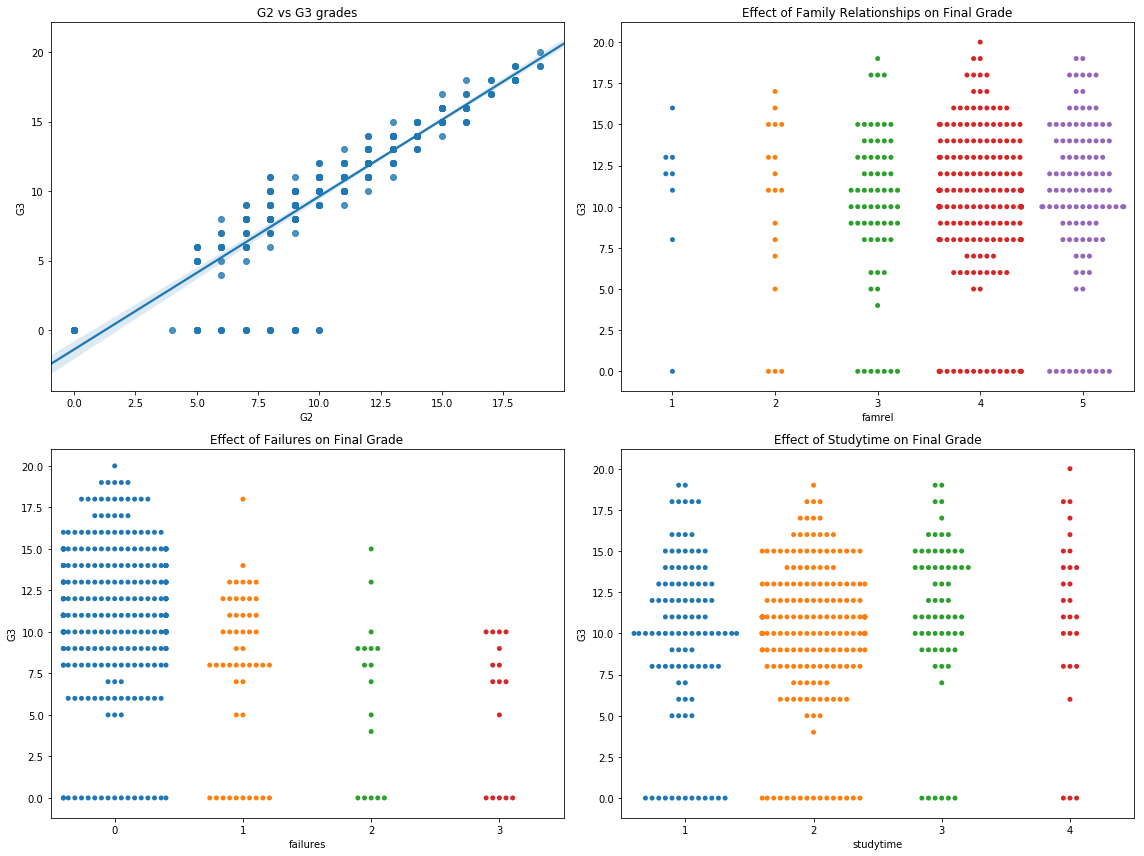

In [3]:
# Lets do some visual-EDA on our data which we will use

fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.regplot('G2', 'G3', data=maths, ax=axes[0, 0]).set_title('G2 vs G3 grades')
sns.swarmplot('failures', 'G3', data=maths, ax=axes[1, 0]).set_title('Effect of Failures on Final Grade')
sns.swarmplot('famrel', 'G3', data=maths, ax=axes[0, 1]).set_title('Effect of Family Relationships on Final Grade')
sns.swarmplot('studytime', 'G3', data=maths, ax=axes[1, 1]).set_title('Effect of Studytime on Final Grade')
plt.tight_layout()
plt.show()

Important to note here that the data is generally very well structured. There are no missing values and it is very complete. However sklearn can only accept numerical inputs. In this case I will only use some of the numerical columns we have. I will leave the pre-processing of labeled data for a more in-depth project.

In [4]:
maths = maths.select_dtypes('int64')
maths = maths[['famrel', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']]
print(maths.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths.drop(predict, axis=1))
y = np.array(maths[predict])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
famrel       395 non-null int64
studytime    395 non-null int64
failures     395 non-null int64
absences     395 non-null int64
G1           395 non-null int64
G2           395 non-null int64
G3           395 non-null int64
dtypes: int64(7)
memory usage: 21.7 KB
None


In [5]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

The R^2 is:  0.8316968124174093
famrel :  0.5675565229094424
studytime :  -0.46968540367724887
failures :  -0.5180844666140698
absences :  0.029015504354730215
G1 :  0.11790811767680964
G2 :  0.954990328569435
The intercept of our slope is:  -2.3293128685712166


In conclusion our model explains 83% of the inputs into a students final
score. What we can clearly see is the biggest factor going into the estimation
is the score that they would get in G2. What does look interesting is the fact that
studytime is negatively related to the grade that they get, however this is a very
small factor. 